## Supervised Learning: Challenge

In this challenge, we will try to predict credit card fraud.

Download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from a [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The dataset contains transactions made by credit cards within two days in September 2013 by European cardholders.  Where **we have 492 occurrences of fraud out of the total of 284,807 transactions**. This dataset is highly unbalanced, with the positive class (frauds) account for 0.172% of all transactions.

____________________
### **Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA. The only features that are not transformed with PCA are `'Time'` and `'Amount'`.  

- The feature `'Time'` contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature `'Amount'` is the transaction amount; this feature can be used for example-dependant cost-sensitive learning. 
- The feature `'Class'` is the target variable, and it takes the value of 1 in case of fraud and 0 otherwise.

> #### Warning
> There is a huge class imbalance ratio, so we need to be careful when evaluating. It might be better to use the method `.predict_proba()` with a custom cut-off to search for fraudulent transactions.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')

In [7]:
df['V1'].describe()

count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
X = df.drop('Class', axis=1)

In [12]:
y = df['Class']

In [14]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [21]:
scaler = StandardScaler()

In [26]:
pipe = Pipeline([
    ('standard', StandardScaler()),
    ('model', GaussianNB())
])

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standard', StandardScaler()), ('model', GaussianNB())])

In [28]:
pipe.score(X_test, y_test)

0.9794951019978231

In [38]:
from sklearn.metrics import f1_score, recall_score, confusion_matrix, precision_score, precision_recall_fscore_support, classification_report

In [30]:
y_pred = pipe.predict(X_test)

In [43]:
y_pred_proba = pipe.predict_proba(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.78      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [34]:
cm = confusion_matrix(y_test, y_pred)

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns

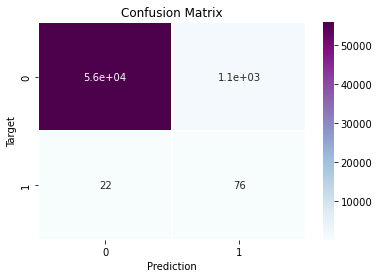

In [37]:
plt.figure()
sns.heatmap(cm, annot=True, cmap='BuPu', linewidths=2, linecolor='white')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# changing the threshold
# higher means very sure 

In [77]:
y_pred_proba2 = np.round(y_pred_proba, 5)

In [81]:
y_pred_proba2[0:10, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
y_pred_thresh = y_pred_proba[:,1] > 0.7

In [109]:
y_pred_thresh.sum()

1198

In [110]:
cm2 = confusion_matrix(y_test, y_pred_thresh)

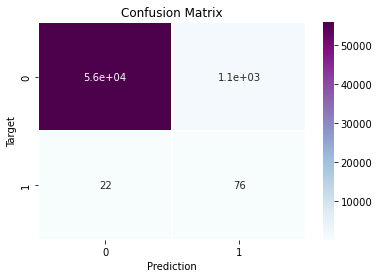

In [111]:
plt.figure()
sns.heatmap(cm2, annot=True, cmap='BuPu', linewidths=2, linecolor='white')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

In [112]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.78      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# precision is still very low - lots of false positives
# but recall is pretty good at 0.78
# could try different models, more tuning
# and trying different thresholds 